In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

import geopandas as gpd

In [4]:
data_17 = pd.read_csv('./data/pobreza0.04_2017.csv', usecols = ['RADIO_REF_ID', 'HOGAR_REF_ID', 'IX_TOT',
       'P03', 'P47T_persona', 'P47T_hogar', 'Pobreza', 'Indigencia'])
data_18 = pd.read_csv('./data/pobreza0.04_2018.csv', usecols = ['RADIO_REF_ID', 'HOGAR_REF_ID', 'IX_TOT',
       'P03', 'P47T_persona', 'P47T_hogar', 'Pobreza', 'Indigencia'])
data = pd.concat([data_17, data_18])

In [47]:
# aglo_labels = pd.read_csv('./data/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
# radio_ref = pd.read_csv('./data/radio_ref.csv')
# # radio_ref[['PROV','NOMPROV','DPTO', 'NOMDPTO']].drop_duplicates().to_csv('./data/DPTO_PROV.csv', index = False)
# dpto_region = pd.read_csv('./data/DPTO_PROV_Region.csv')
# radio_ref = radio_ref.merge(dpto_region)
# radio_ref = radio_ref.merge(aglo_labels)
# radio_ref = radio_ref[['RADIO_REF_ID', 'radio', 'FRAC_REF_ID', 'IDFRAC','DPTO', 'NOMDPTO', 'AGLOMERADO', 'NOMAGLO', 'PROV', 'NOMPROV', 'Region']].drop_duplicates()
# radio_ref['radio'] = radio_ref.radio.astype(int).astype(str).str.zfill(9)
# radio_ref.to_csv('./data/radio_frac_dpto_aglo_prov.csv', index=False)

radio_ref = pd.read_csv('./data/radio_frac_dpto_aglo_prov.csv')

In [ ]:
radio_ref.head()

In [64]:
radios_gdf = gpd.GeoDataFrame.from_file('./../../Documents/mapas_censo/poligonos/radios_censales/radios_w_geometry.shp').rename(columns = {'LINK': 'radio'})
radios_gdf['link'] = radios_gdf['radio'].str[:5]

In [58]:
frac = 0.04

# nivel = 'FRAC_REF_ID'
nivel = 'DPTO'

est_17 = (data_17.groupby('RADIO_REF_ID')[['Pobreza', 'Indigencia']].sum()/frac).reset_index().astype(int)
est_17 = est_17.merge(radio_ref[['RADIO_REF_ID', nivel]], how = 'left')
est_17 = est_17.groupby(nivel).sum()[['Pobreza', 'Indigencia']].sort_index()

est_18 = (data_18.groupby('RADIO_REF_ID')[['Pobreza', 'Indigencia']].sum()/frac).reset_index().astype(int)
est_18 = est_18.merge(radio_ref[['RADIO_REF_ID', nivel]], how = 'left')
est_18 = est_18.groupby(nivel).sum()[['Pobreza', 'Indigencia']].sort_index()

In [325]:
(data_18.loc[data_18.P03 < 25].groupby('P03')['Indigencia'].sum()/frac).sum()

2691275.0

In [324]:
data_18[['Pobreza', 'Indigencia']].mean()

Pobreza       0.364370
Indigencia    0.087392
dtype: float64

In [50]:
# radio_ref[['RADIO_REF_ID', 'FRAC_REF_ID']]

frac = gpd.read_file('./../../Documents/censo_geo/pxfracdatosok.shp')
frac = frac.merge(radio_ref[['DPTO','IDFRAC', 'FRAC_REF_ID']].drop_duplicates())[['FRAC_REF_ID', 'geometry']]
frac = gpd.GeoDataFrame(frac)

In [278]:
dpto = gpd.read_file('./../../Documents/censo_geo/pxdptodatosok.shp')
dpto = dpto.sort_values('link').reset_index(drop = True)

fancy_crs = {u'lat_0': -35,
 u'lon_0': -65,
 u'no_defs': True,
 u'proj': u'ortho',
 u'units': u'm',
 u'x_0': -65,
 u'y_0': -35,
 u'a' : 6371000, 
 u'b' : 6371000}
dpto.crs = {'init': 'epsg:4326'} #latlong
# dpro = dpto.to_crs({'init': 'epsg:3395'}) #lo dejamos en metrico
dpto = dpto.to_crs(fancy_crs)

In [69]:
radio_ref['link'] = radio_ref['radio'].astype(str).str.zfill(9).str[:5]

In [77]:
# est_17.reset_index().merge(radio_ref[['DPTO', 'link']].drop_duplicates()).merge(dpto[['link', 'geometry']], how = 'left')


In [102]:
df = est_17.sort_values(by = 'Pobreza', ascending = False).reset_index()

In [ ]:
# ordenar de mayor a menor
# Ver cuantos 141vos le entran a los partidos mas grandes.

In [231]:
pd.options.display.max_rows = 600

In [103]:
df['unidades'] = (141*df['Pobreza']/df['Pobreza'].sum()).round()

In [107]:
df.merge(radio_ref[['DPTO', 'NOMDPTO', 'NOMPROV']].drop_duplicates())

,DPTO,Pobreza,Indigencia,unidades,NOMDPTO,NOMPROV
0,6427,737250,123300,25.0,La Matanza,Buenos Aires
1,14014,394325,85350,14.0,Capital,Córdoba
2,82084,352325,71650,12.0,Rosario,Santa Fe
3,6539,231750,42575,8.0,Merlo,Buenos Aires
4,6274,223075,47750,8.0,Florencio Varela,Buenos Aires
5,6560,217375,43875,7.0,Moreno,Buenos Aires
6,6490,201475,41475,7.0,Lomas de Zamora,Buenos Aires
7,6658,201425,36550,7.0,Quilmes,Buenos Aires
8,66028,201275,45500,7.0,Capital,Salta
9,6028,193775,34750,7.0,Almirante Brown,Buenos Aires


In [122]:
import numpy as np

# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.

In [255]:
full_route = np.array([])
for pcia in dpto.provincia.unique():
    print(pcia)
    prov_df = dpto.loc[dpto.provincia == pcia]
    points = np.array([ np.array((p.xy[0][0], p.xy[1][0])) for p in prov_df.geometry.centroid ])
    route = two_opt(points, .02)
    
    prov_route = prov_df.index[0] + route
    full_route = np.append(full_route, prov_route)
# full_route

Ciudad Autónoma de Buenos Aires
Buenos Aires
Catamarca
Córdoba
Corrientes
Chaco
Chubut
Entre Ríos
Formosa
Jujuy
La Pampa
La Rioja
Mendoza
Misiones
Neuquén
Río Negro
Salta
San Juan
San Luis
Santa Cruz
Santa Fe
Santiago del Estero
Tucumán
Tierra del Fuego


array([   0.,    3.,    2.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   14.,   11.,   12.,   13.,    1.,   15.,  124.,  143.,
        107.,  140.,   72.,   47.,   29.,  103.,   35.,   73.,  106.,
        118.,   71.,   55.,   36.,   85.,   66.,   84.,   58.,   39.,
        108.,  131.,  116.,   25.,  123.,  119.,   77.,   70.,   30.,
        144.,   17.,   44.,   46.,  134.,   37.,   34.,  132.,   24.,
        126.,  125.,   52.,  148.,   32.,  110.,   89.,   68.,   99.,
         76.,  130.,   92.,   50.,  128.,  137.,  129.,  145.,   80.,
         19.,  115.,   88.,   51.,   53.,   79.,  100.,  142.,   69.,
         74.,   75.,   96.,   94.,   63.,   95.,  101.,   87.,   33.,
        133.,  112.,   18.,   54.,   27.,   31.,   81.,   49.,   28.,
         90.,  114.,   45.,   65.,   97.,  120.,  122.,   83.,   21.,
        136.,   57.,  104.,   26.,  135.,  117.,   59.,  109.,   38.,
        138.,   64.,   78.,  111.,  146.,   61.,   93.,   91.,   48.,
         60.,   20.,

In [221]:
import warnings
warnings.filterwarnings('ignore')

In [256]:
est_17['link'] = est_17.index.astype(str).str.zfill(5)

names = radio_ref[['link', 'NOMDPTO', 'NOMPROV']].drop_duplicates()

sorted_est_17 = est_17.set_index('link').loc[dpto.loc[full_route]['link'].values]
sorted_est_17 = sorted_est_17.reset_index().merge(names)

In [334]:
sorted_est_17['coords'] = (np.sqrt(2e4)*sorted_est_17['Pobreza']/sorted_est_17['Pobreza'].sum())

# por provincia
sorted_est_17['coords'] = sorted_est_17.groupby('NOMPROV', sort = False).apply(lambda x: x['coords'].cumsum()).values
sorted_est_17['coords'] = sorted_est_17.groupby('NOMPROV', sort = False).apply(lambda x: x['coords'].max().round()*x['coords']/x['coords'].max()).values
sorted_est_17['coords'] = (sorted_est_17['coords'] + .49).round()
# sorted_est_17['coords'] = sorted_est_17.groupby('NOMPROV', sort = False).apply(lambda x: x['coords'].cumsum()).values.round()

sorted_est_17['voluns'] = (20000*sorted_est_17['Pobreza']/sorted_est_17['Pobreza'].sum()).round()

# sorted_est_17

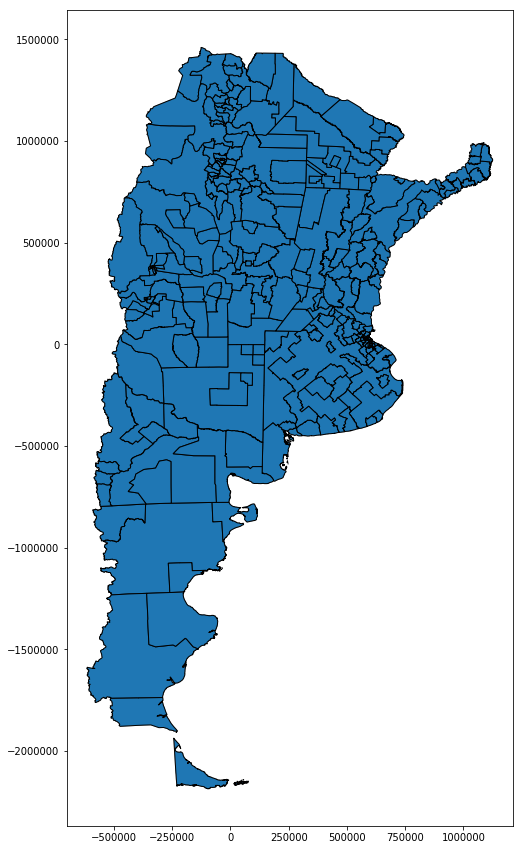

In [343]:
sorted_est_17_gdf = gpd.GeoDataFrame(sorted_est_17.merge(dpto[['link', 'geometry']]))
# 
# sorted_est_17_gdf.plot('coords')

plot_gdf = sorted_est_17_gdf.dissolve(['NOMPROV', 'coords'])
fig, ax = plt.subplots(1, figsize = (8, 15))
dpto.drop([525, 526]).plot(color='None', edgecolor='.7', ax = ax)
# dpto.drop([525, 526]).plot(edgecolor='.7', ax = ax)
plot_gdf.plot(color='None', edgecolor='black', ax = ax)
plt.show()

In [340]:
sorted_est_17['coords'] = (sorted_est_17['voluns']/141).round(1)
sorted_est_17.sort_values('voluns', ascending = False)

,link,Pobreza,Indigencia,NOMDPTO,NOMPROV,coords,voluns
77,06427,737250.0,123300.0,La Matanza,Buenos Aires,7.2,1014.0
188,14014,394325.0,85350.0,Capital,Córdoba,3.8,542.0
464,82084,352325.0,71650.0,Rosario,Santa Fe,3.4,485.0
83,06539,231750.0,42575.0,Merlo,Buenos Aires,2.3,319.0
93,06274,223075.0,47750.0,Florencio Varela,Buenos Aires,2.2,307.0
62,06560,217375.0,43875.0,Moreno,Buenos Aires,2.1,299.0
73,06658,201425.0,36550.0,Quilmes,Buenos Aires,2.0,277.0
421,66028,201275.0,45500.0,Capital,Salta,2.0,277.0
74,06490,201475.0,41475.0,Lomas de Zamora,Buenos Aires,2.0,277.0
92,06028,193775.0,34750.0,Almirante Brown,Buenos Aires,1.9,267.0


In [ ]:
xx

In [164]:
gdf = gpd.GeoDataFrame(radio_target.merge(
    radio_ref[['RADIO_REF_ID', 'radio']]).merge(radios_gdf))

In [151]:
# gdf = gdf.to_crs({'init': 'epsg:4326'})

In [165]:
name = 'radios_indigencia_'

save_geojson(gdf, name + '.geojson')

username = 'matuteiglesias'
token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'

files = os.listdir('./geojson/')
files = [f for f in files if name in f]

names = [name.split('.')[0] for name in files]

for i in range(len(files)):
    print(names[i])
    data_ = json.load(open('./geojson/'+files[i]))

    try:
        upload_file(data_, names[i])
    except:
        pass

radios_indigencia_
